In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import torch

In [2]:
time_t = []
desired_FL = []
desired_FR = []
desired_RL = []
desired_RR = []
t = 0

gait_indices = 0
frequencies = 3.
phase = 0.5
offsets = 0
bounds = 0
durations = 0.5
kappa = 0.05
dt = 0.002
smoothing_cdf_start = torch.distributions.normal.Normal(0,kappa).cdf
gait_indices = torch.zeros(1, dtype = torch.float, device = 'cpu', requires_grad= False)



for i in range(500):
    t += dt
    time_t.append(t)
    gait_indices = torch.remainder(gait_indices + dt * frequencies, 1.0)
    foot_indices = [gait_indices,
                    torch.remainder(gait_indices + phase, 1.0),
                    torch.remainder(gait_indices + phase, 1.0),
                    gait_indices]
    
    RL = (smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[2], 1.0) - 0.5 - 1)))
    RR = (smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[3], 1.0) - 0.5 - 1)))
    desired_FL.append(1.)
    desired_FR.append(1.)
    desired_RL.append(RL)
    desired_RR.append(RR)

desired_FL = torch.tensor(desired_FL).squeeze()
desired_FR = torch.tensor(desired_FR).squeeze()
desired_RL = torch.tensor(desired_RL).squeeze()
desired_RR = torch.tensor(desired_RR).squeeze()


In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axs[0].plot(time_t, desired_FL, 'g-', label="FL")
axs[0].set_title("Front Left Foot (FL)")
axs[0].legend()

axs[1].plot(time_t, desired_FR, 'b-', label="FR")
axs[1].set_title("Front Right Foot (FR)")
axs[1].legend()

axs[2].plot(time_t, desired_RL, 'r-', label="RL")
axs[2].set_title("Rear Left Foot (RL)")
axs[2].legend()

axs[3].plot(time_t, desired_RR, 'k-', label="RR")
axs[3].set_title("Rear Right Foot (RR)")
axs[3].legend()

for ax in axs:
    ax.set_ylabel("Contact Signal")
    ax.grid(True)
axs[-1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()


In [ ]:
time_t = []
desired_FL = []
desired_FR = []
desired_RL = []
desired_RR = []
t = 0

gait_indices = 0
frequencies = 3.
phase = 0.5
offsets = 0
bounds = 0
durations = 0.5
kappa = 0.05
dt = 0.002
smoothing_cdf_start = torch.distributions.normal.Normal(0,kappa).cdf
gait_indices = torch.zeros(1, dtype = torch.float, device = 'cpu', requires_grad= False)



for i in range(500):
    t += dt
    time_t.append(t)
    gait_indices = torch.remainder(gait_indices + dt * frequencies, 1.0)
    foot_indices = [gait_indices,
                    torch.remainder(gait_indices + phase, 1.0),
                    torch.remainder(gait_indices + phase, 1.0),
                    gait_indices]
    
    FL = (smoothing_cdf_start(torch.remainder(foot_indices[0], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[0], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[0], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[0], 1.0) - 0.5 - 1)))

    FR = (smoothing_cdf_start(torch.remainder(foot_indices[1], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[1], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[1], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[1], 1.0) - 0.5 - 1)))
    
    RL = (smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[2], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[2], 1.0) - 0.5 - 1)))
    RR = (smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0)) * (
                    1 - smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0) - 0.5)) +
                                       smoothing_cdf_start(torch.remainder(foot_indices[3], 1.0) - 1) * (
                                               1 - smoothing_cdf_start(
                                           torch.remainder(foot_indices[3], 1.0) - 0.5 - 1)))
    desired_FL.append(FL)
    desired_FR.append(FR)
    desired_RL.append(RL)
    desired_RR.append(RR)

desired_FL = torch.tensor(desired_FL).squeeze()
desired_FR = torch.tensor(desired_FR).squeeze()
desired_RL = torch.tensor(desired_RL).squeeze()
desired_RR = torch.tensor(desired_RR).squeeze()

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axs[0].plot(time_t, desired_FL, 'g-', label="FL")
axs[0].set_title("Front Left Foot (FL)")
axs[0].legend()

axs[1].plot(time_t, desired_FR, 'b-', label="FR")
axs[1].set_title("Front Right Foot (FR)")
axs[1].legend()

axs[2].plot(time_t, desired_RL, 'r-', label="RL")
axs[2].set_title("Rear Left Foot (RL)")
axs[2].legend()

axs[3].plot(time_t, desired_RR, 'k-', label="RR")
axs[3].set_title("Rear Right Foot (RR)")
axs[3].legend()

for ax in axs:
    ax.set_ylabel("Contact Signal")
    ax.grid(True)
axs[-1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

In [ ]:
def sigmoid(x, k):
    return 1 / (1 + torch.exp(-k * (x - 0.5)))

In [3]:
# THIS IS THE FINAL VERSION OF SAMPLING

def sigmoid(x, k, lower, upper):
    # Scale and shift x to have the sigmoid's midpoint at the center of the range [a, b]
    # and adjust steepness with k
    midpoint = (lower + upper) / 2.0
    scale = k / (upper - lower)
    return 1 / (1 + torch.exp(-scale * (x - midpoint)))

def sample_sigmoid_range_torch(a, b, n_samples=1000, k=10):

    values = torch.linspace(a, b, n_samples)
    probs = sigmoid(values, k=k, a=a, b=b)
    probs /= probs.sum()
    
    sampled_index = torch.multinomial(probs, num_samples=1)
    sampled_value = values[sampled_index]
    
    return sampled_value.item()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def sigmoid(x, k, lower, upper):
    midpoint = (lower + upper) / 2.0
    scale = k / (upper - lower)
    return 1 / (1 + np.exp(-scale * (x - midpoint)))

def visualize_sigmoid_sampling(a, b, n_samples=1000, k = 1):

    values = np.linspace(a, b, n_samples)

    probs = sigmoid(values, k, a, b)
    probs /= probs.sum()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(values, probs, label='Sigmoid-based Probabilities')
    plt.fill_between(values, probs, alpha=0.4)
    plt.title('Sampling Probabilities Following a Sigmoid Distribution')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()
    


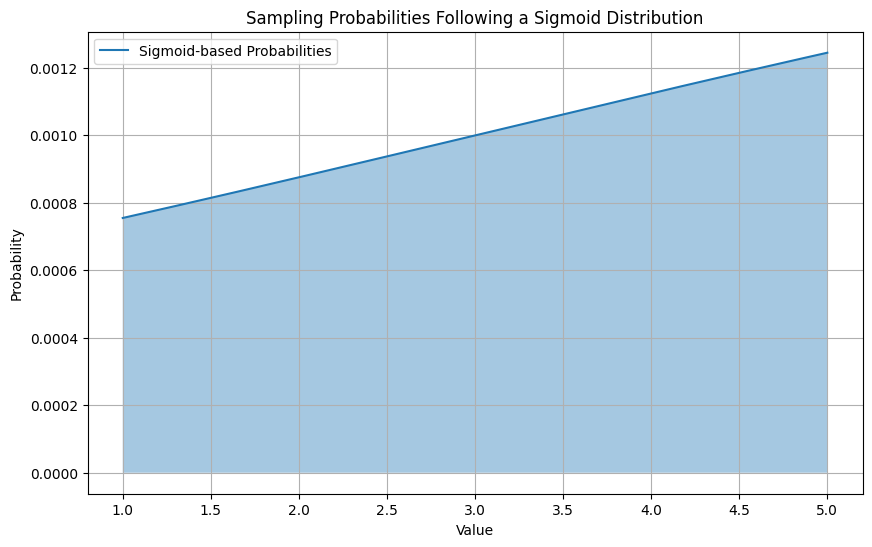

In [7]:
visualize_sigmoid_sampling(1, 5, k = 1)

In [5]:
def sigmoid(x, k, lower, upper):
    midpoint = (lower + upper) / 2.0
    scale = k / (upper - lower)
    return 1 / (1 + torch.exp(-scale * (x - midpoint)))
def adaptive_sample_vel_cmd(min_vel, max_vel, current_step, env_ids, device, total_iterations = 10000, n_samples = 1000, steps_per_iteration = 24):
    #  NOTE: STUPID HARD CODING Method
    # compute k with total_iteration, k_range
    # num_steps_per_env = 24, so consider 24 steps as one iteration.
    if len(env_ids) == 0:
        env_ids = torch.tensor([0])
    current_iteration = current_step // steps_per_iteration
    k_min = -10
    k_max = 3
    k = k_min + (current_iteration * (k_max - k_min) /  total_iterations)
    values = torch.linspace(min_vel, max_vel, n_samples)
    probs = sigmoid(values, k, min_vel, max_vel)
    probs /= probs.sum()
    sampled_indices = torch.multinomial(probs, num_samples=len(env_ids), replacement=True)
    sampled_velocities = values[sampled_indices]
    commands = torch.zeros_like(env_ids, dtype = torch.float, device = device)
    for i, env_id in enumerate(env_ids):
        commands[i] = sampled_velocities[i]
    return commands


In [8]:
adaptive_sample_vel_cmd(1, 5, 300, torch.tensor([1,3]), device = "cpu")

tensor([2.3854, 2.6376])